In [2]:
#整合版本
# import pandas as pd
# import numpy as np
# import os
# from collections import Counter
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import RidgeClassifier
# from sklearn.metrics import f1_score
 
# os.getcwd()
 
# # 读取数据
# path='D:\\Pythonstudy\\Python pycharm\\Project\\Machine learning\\'
# train = pd.read_csv(path+'train_set.csv', sep='\t')
# test = pd.read_csv(path+'test_a.csv', sep='\t')
 
# # 1.数据分析
 
# # 数据探索
# train.head()
 
# test.head()
 
# ### 1.1句子长度分析
# ###在赛题数据中每行句子的字符使用空格进行隔开，所以可以直接统计单词的个数来得到每个句子的长度。统计并如下：
 
 
# %pylab inline
# train['text_len'] = train['text'].apply(lambda x: len(x.split(' ')))
# print(train['text_len'].describe())
 
# ###对新闻句子的统计可以得出，本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。
# ###下图将句子长度绘制了直方图，可见大部分句子的长度都几乎在2000以内。
 
# _ = plt.hist(train['text_len'], bins=200)
# plt.xlabel('Text length')
# plt.title("Histogram of text length")
# plt.xlim(-0.5,7000) # x轴度量范围
 
# ### 1.2新闻类别分布
# ###接下来可以对数据集的类别进行分布统计，具体统计每类新闻的样本个数。
 
# train['label'].value_counts().plot(kind='bar')
# plt.title('News class count')
# plt.xlabel("category")
 
# ###在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
 
# ###从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。
 
# ### 1.3字符分布统计
# ###接下来可以统计每个字符出现的次数，首先可以将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数。
 
# ###从统计结果中可以看出，在训练集中总共包括6869个字，其中编号3750的字出现的次数最多，编号3133的字出现的次数最少。
 
 
# all_lines = ' '.join(list(train['text']))
# word_count = Counter(all_lines.split(" "))
# word_count
# # dict.items() 返回可遍历的(键, 值) 元组数组
# # key -- 主要是用来进行比较的元素，只有一个参数，具体的函数的参数就是取自于可迭代对象中，指定可迭代对象中的一个元素来进行排序。
# word_count = sorted(word_count.items(), key=lambda x:x[1], reverse = True)  # reverse = True降序
 
# print(len(word_count))
 
# print(word_count[0])
 
# print(word_count[-1])
# word_count
 
# ###这里还可以根据字在每个句子的出现情况，反推出标点符号。
 
# ###下面代码统计了不同字符在句子中出现的次数（新闻次数），其中字符3750，字符900和字符648在20w条新闻的覆盖率接近99%，很有可能是标点符号。
 
# train['text_unique'] = train['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
# all_lines = ' '.join(list(train['text_unique']))
# word_count = Counter(all_lines.split(" "))
# word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)
 
# print(word_count[0])
 
# print(word_count[1])
 
# print(word_count[2])
 
# ### 数据分析的结论
 
# ###通过上述分析我们可以得出以下结论：
 
# ###赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
# ###赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
# ###赛题总共包括7000-8000个字符；
# ###通过数据分析，我们还可以得出以下结论：
 
# ###每个新闻平均字符个数较多，可能需要截断；
 
# ###由于类别不均衡，会严重影响模型的精度；


In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score
 
os.getcwd()
 
# 读取数据
path='D:\\Pythonstudy\\Python pycharm\\Project\\Machine learning\\'
train = pd.read_csv(path+'train_set.csv', sep='\t')
test = pd.read_csv(path+'test_a.csv', sep='\t')
 
# 1.数据分析
 
# 数据探索
train.head()
 
test.head()

,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...


Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


(-0.5, 7000.0)

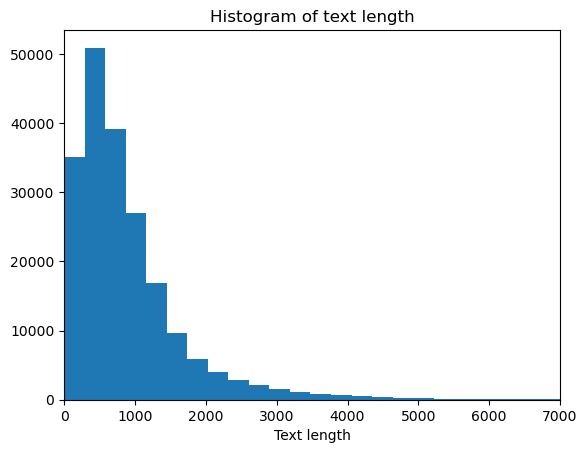

In [2]:
### 1.1句子长度分析
###在赛题数据中每行句子的字符使用空格进行隔开，所以可以直接统计单词的个数来得到每个句子的长度。统计并如下：
 
 
%pylab inline
train['text_len'] = train['text'].apply(lambda x: len(x.split(' ')))
print(train['text_len'].describe())

###对新闻句子的统计可以得出，本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。
###下图将句子长度绘制了直方图，可见大部分句子的长度都几乎在2000以内。
 
_ = plt.hist(train['text_len'], bins=200)
plt.xlabel('Text length')
plt.title("Histogram of text length")
plt.xlim(-0.5,7000) # x轴度量范围

Text(0.5, 0, 'category')

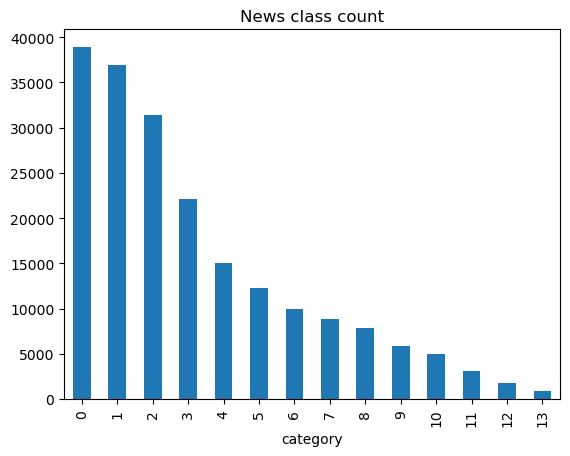

In [8]:
### 1.2新闻类别分布
###接下来对数据集的类别进行分布统计，具体统计每类新闻的样本个数。

 
train['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

 
###在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
 
###从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

In [3]:
### 1.3字符分布统计
###接下来可以统计每个字符出现的次数，首先可以将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数。
 
###从统计结果中可以看出，在训练集中总共包括6869个字，其中编号3750的字出现的次数最多，编号3133的字出现的次数最少。
 
all_lines = ' '.join(list(train['text']))
word_count = Counter(all_lines.split(" "))
word_count


Counter({'2967': 150472,
         '6758': 23368,
         '339': 10114,
         '2021': 83310,
         '1854': 222220,
         '3731': 54661,
         '4109': 207564,
         '3792': 157293,
         '4149': 452545,
         '1519': 805002,
         '2058': 128542,
         '3912': 110946,
         '2465': 1087011,
         '2410': 146674,
         '1219': 97691,
         '6654': 111067,
         '7539': 523090,
         '264': 110968,
         '2456': 123589,
         '4811': 1159401,
         '1292': 32874,
         '2109': 921676,
         '6905': 19983,
         '5520': 161014,
         '7058': 216345,
         '6045': 381639,
         '3634': 156543,
         '6591': 1184,
         '3530': 315586,
         '6508': 207142,
         '7044': 202832,
         '3659': 1251253,
         '2073': 449518,
         '3750': 7482224,
         '6831': 332620,
         '2614': 570863,
         '3370': 2020958,
         '4269': 402128,
         '486': 227281,
         '5770': 11919,
        

In [4]:
# dict.items() 返回可遍历的(键, 值) 元组数组
# key -- 主要是用来进行比较的元素，只有一个参数，具体的函数的参数就是取自于可迭代对象中，指定可迭代对象中的一个元素来进行排序。
word_count = sorted(word_count.items(), key=lambda x:x[1], reverse = True)  # reverse = True降序
 
print(len(word_count))
 
print(word_count[0])
 
print(word_count[-1])
word_count


6869
('3750', 7482224)
('3133', 1)


[('3750', 7482224),
 ('648', 4924890),
 ('900', 3262544),
 ('3370', 2020958),
 ('6122', 1602363),
 ('4464', 1544962),
 ('7399', 1455864),
 ('4939', 1387951),
 ('3659', 1251253),
 ('4811', 1159401),
 ('5598', 1121908),
 ('2465', 1087011),
 ('669', 1086645),
 ('2400', 1031116),
 ('5560', 1020573),
 ('299', 927955),
 ('2109', 921676),
 ('4893', 917183),
 ('4411', 884362),
 ('1699', 853028),
 ('1519', 805002),
 ('803', 786906),
 ('1635', 785260),
 ('6065', 753778),
 ('5998', 723615),
 ('1903', 689400),
 ('5445', 679277),
 ('1324', 666498),
 ('2376', 647118),
 ('340', 638801),
 ('4659', 629805),
 ('3800', 609360),
 ('5948', 606320),
 ('1460', 603450),
 ('1633', 595355),
 ('1985', 590549),
 ('6017', 574746),
 ('2614', 570863),
 ('3961', 563485),
 ('1465', 561794),
 ('5393', 559824),
 ('4853', 559247),
 ('2210', 555852),
 ('5602', 553860),
 ('6250', 551889),
 ('3700', 542192),
 ('5977', 540044),
 ('2799', 537723),
 ('4646', 527899),
 ('7539', 523090),
 ('4516', 514667),
 ('2252', 510391),
 ('

In [5]:
###这里还可以根据字在每个句子的出现情况，反推出标点符号。
 
###下面代码统计了不同字符在句子中出现的次数（新闻次数），其中字符3750，字符900和字符648在20w条新闻的覆盖率接近99%，很有可能是标点符号。
 
train['text_unique'] = train['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)
 
print(word_count[0])
 
print(word_count[1])
 
print(word_count[2])



('3750', 197997)
('900', 197653)
('648', 191975)


In [7]:

### 数据分析的结论
 
###通过上述分析我们可以得出以下结论：
 
###赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
###赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
###赛题总共包括7000-8000个字符；
###通过数据分析，我们还可以得出以下结论：
 
###每个新闻平均字符个数较多，可能需要截断；
 
###由于类别不均衡，会严重影响模型的精度；
